In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('wine-clustering.csv')

In [3]:
print(df.shape)
print(df.columns)

(178, 13)
Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')


In [4]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [7]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [8]:
df.skew()

Alcohol                -0.051482
Malic_Acid              1.039651
Ash                    -0.176699
Ash_Alcanity            0.213047
Magnesium               1.098191
Total_Phenols           0.086639
Flavanoids              0.025344
Nonflavanoid_Phenols    0.450151
Proanthocyanins         0.517137
Color_Intensity         0.868585
Hue                     0.021091
OD280                  -0.307285
Proline                 0.767822
dtype: float64

1.0396511925814442
1.098191054755161


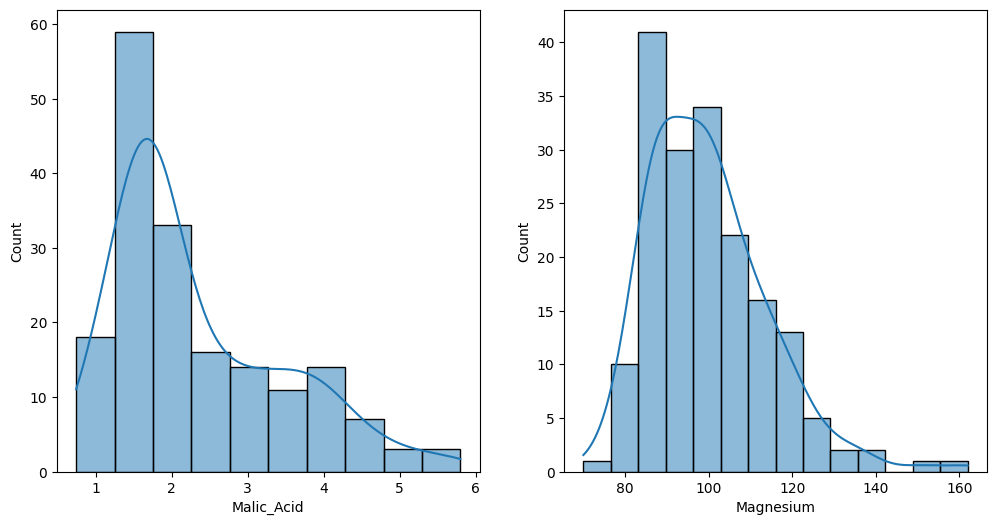

In [9]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
print(df['Malic_Acid'].skew())
sns.histplot(df['Malic_Acid'],kde=True)
plt.subplot(1,2,2)
print(df['Magnesium'].skew())
sns.histplot(df['Magnesium'],kde=True)
plt.show()

In [10]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson')
df['Malic_Acid']=pt.fit_transform(df[['Malic_Acid']])
df['Magnesium']=pt.fit_transform(df[['Magnesium']])

0.07300709763941174
0.006539201406902773


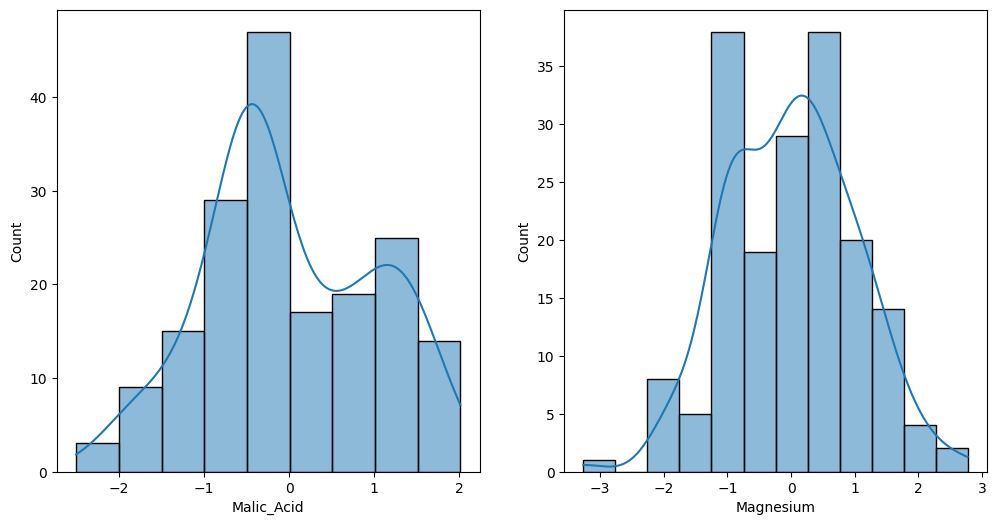

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
print(df['Malic_Acid'].skew())
sns.histplot(df['Malic_Acid'],kde=True)
plt.subplot(1,2,2)
print(df['Magnesium'].skew())
sns.histplot(df['Magnesium'],kde=True)
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler
Scaler=StandardScaler()
x_scaled=Scaler.fit_transform(df)
x_transformed = pt.fit_transform(x_scaled)

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,adjusted_rand_score

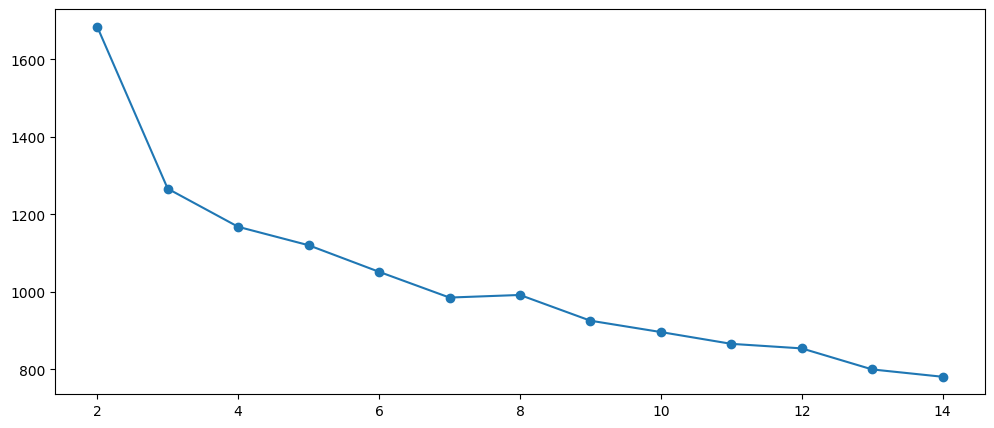

In [14]:
inertia=[]
k_range=range(2,15)
for k in k_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_transformed)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(12,5))
plt.plot(k_range,inertia,marker='o')
plt.show()

In [15]:
kmeans=KMeans(n_clusters=3,random_state=42)
df['kmeans_cluster'] = kmeans.fit_predict(x_transformed)
score=silhouette_score(x_transformed,df['kmeans_cluster'])
print(df['kmeans_cluster'].value_counts())
print(f"silhouette score:{score}")

kmeans_cluster
0    64
2    62
1    52
Name: count, dtype: int64
silhouette score:0.2994966775084193


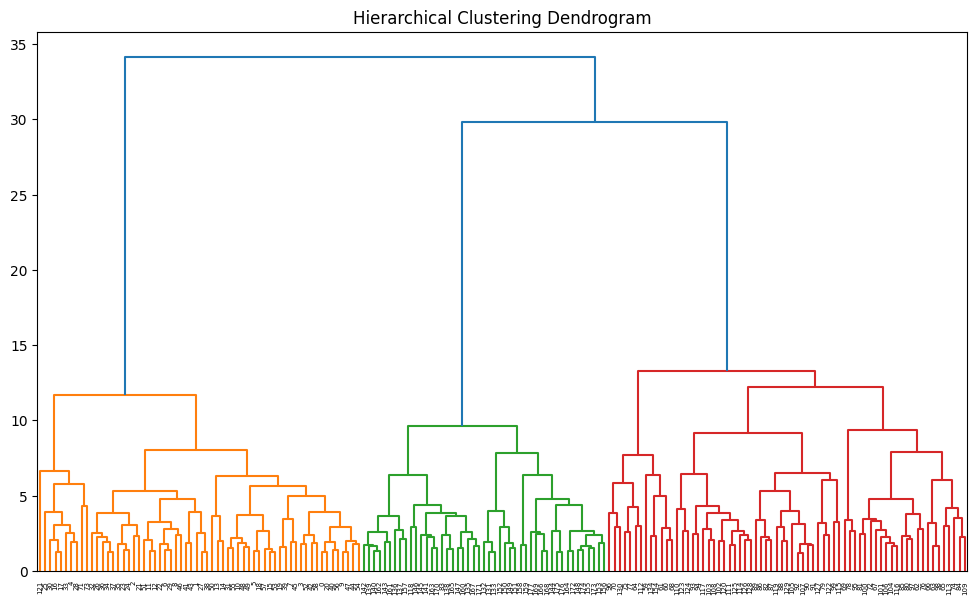

In [16]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster
z=linkage(x_transformed,method='ward')
plt.figure(figsize=(12,7))
dendrogram(z)
plt.title("Hierarchical Clustering Dendrogram")
plt.show()

In [17]:

df['hier_cluster'] = fcluster(z, t=2, criterion='maxclust')
print(df['hier_cluster'].value_counts())

hier_cluster
2    116
1     62
Name: count, dtype: int64


In [18]:
score_hierachy=silhouette_score(x_transformed,df['hier_cluster'])
score_hierachy

0.241990279841242

In [19]:
from sklearn.cluster import DBSCAN

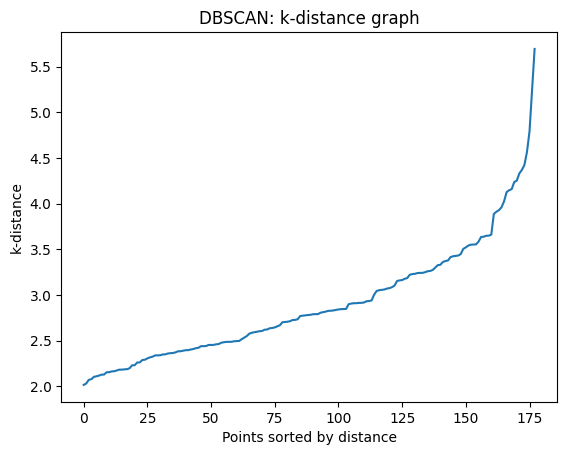

In [33]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

neighbors = NearestNeighbors(n_neighbors=14)
neighbors_fit = neighbors.fit(x_transformed)
distances, indices = neighbors_fit.kneighbors(x_transformed)
distances = np.sort(distances[:,-1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("DBSCAN: k-distance graph")
plt.show()

In [54]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np
eps_values = np.arange(1, 2.8, 0.2)
min_samples = 14

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(x_transformed)
    mask = labels != -1
    if sum(mask) > 1:
        sil_score = silhouette_score(x_transformed[mask], labels[mask])
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        print(f"eps={eps:.2f}, clusters={n_clusters}, Silhouette Score={sil_score:.4f}")
    else:
        print(f"eps={eps:.2f}, Not enough clusters to calculate silhouette")

eps=1.00, Not enough clusters to calculate silhouette
eps=1.20, Not enough clusters to calculate silhouette
eps=1.40, Not enough clusters to calculate silhouette
eps=1.60, Not enough clusters to calculate silhouette
eps=1.80, Not enough clusters to calculate silhouette
eps=2.00, Not enough clusters to calculate silhouette
eps=2.20, clusters=2, Silhouette Score=0.5276
eps=2.40, clusters=2, Silhouette Score=0.5001
eps=2.60, clusters=3, Silhouette Score=0.3817


In [38]:
x_transformed.shape

(178, 13)

In [52]:
dbscan=DBSCAN(eps=2.5,min_samples=14)
cluster_labels=dbscan.fit_predict(x_transformed)
df['dbscan_cluster']=cluster_labels
print(df['dbscan_cluster'].value_counts())

dbscan_cluster
-1    75
 0    59
 1    44
Name: count, dtype: int64


In [53]:
labels = cluster_labels[cluster_labels != -1] 
X_valid = x_transformed[cluster_labels != -1]
if len(set(labels)) > 1:
    score = silhouette_score(X_valid, labels)
    print("Silhouette Score:", score)
else:
    print("Not enough clusters to compute silhouette score")


Silhouette Score: 0.4837291601850873
